In [1]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *
import seaborn as sns


sns.set()

# SGD

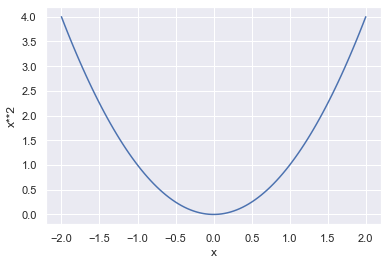

In [2]:
def f(x):
    return x**2


plot_function(f, 'x', 'x**2')

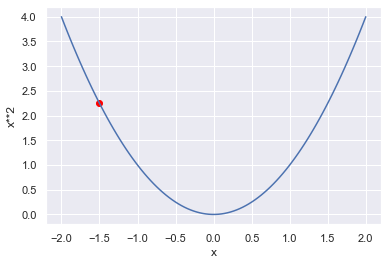

In [3]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

##### Gradient calculation

In [4]:
xt = tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [5]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [6]:
yt.backward()

In [7]:
xt.grad

tensor(6.)

##### Now grad calc with vector

In [8]:
def f(x):
    return (x ** 2).sum()

In [9]:
xt = tensor([3., 4., 10.]).requires_grad_()

In [10]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [11]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [12]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

##### Synthetic model: roller coaster

In [13]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

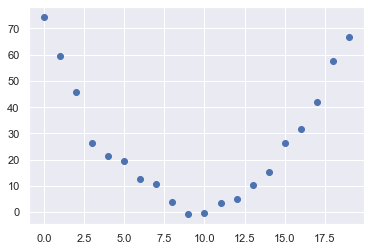

In [14]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [15]:
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [16]:
def mse(preds, targets):
    return ((preds-targets)**2).mean()

##### Let's find a, b, c parametrs for function f 

##### STEP 1: INITIALIZE THE PARAMETERS

In [17]:
params = torch.randn(3).requires_grad_()

##### STEP 2: CALCULATE THE PREDICTIONS

In [18]:
preds = f(time, params)

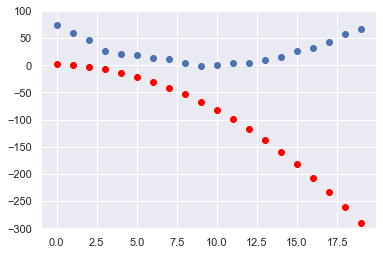

In [19]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)


show_preds(preds)    

##### STEP 3: CALCULATE THE LOSS

In [20]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

##### STEP 4: CALCULATE THE GRADIENTS

In [21]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [22]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [23]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

##### STEP 5: STEP THE WEIGHTS

In [24]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

##### Let's see the result

In [25]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

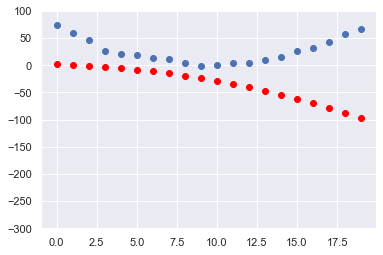

In [26]:
show_preds(preds)

Let's create a function that will train our model

In [27]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds

In [28]:
for i in range(10): 
    apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


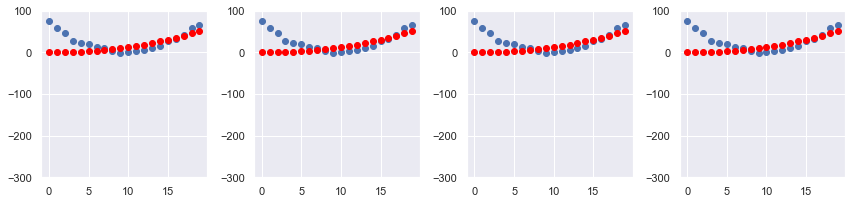

In [29]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()